# Get Data

### import modules

In [1]:
from nilearn import image, datasets, input_data, plotting

import os

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline

### download data

In [2]:
#%%bash
#
#wget https://www.nitrc.org/frs/download.php/9322/lx.zip -O ../test.zip

In [3]:
#%%bash
#tar -xzvf ../test.tar.gz -C ../

### extracting data from certain coordinates

In [4]:
exampleSeeds = [(-48,-50,4),(-30,-40,66),(0,10,10)]

In [5]:
seedMaskerRaw = input_data.NiftiSpheresMasker(exampleSeeds,radius=5,
                                              standardize=False,detrend=False).fit()

In [6]:
seedMaskerStd = input_data.NiftiSpheresMasker(exampleSeeds,radius=5,
                                              standardize=True,detrend=True).fit()

### extracting voxel-wise data

In [7]:
brainMaskerRaw = input_data.NiftiMasker(mask_img='../masks/MNI152_T1_2mm_brain_mask.nii.gz',
                                        standardize=False,detrend=False).fit()

In [8]:
brainMaskerStd = input_data.NiftiMasker(mask_img='../masks/MNI152_T1_2mm_brain_mask.nii.gz',
                                        standardize=True,detrend=True).fit()

### use masker to get data from run

In [9]:
def getData(i,masker,conf=True):
    # get fmri run
    epi = '../data/wrrun00%s.nii.gz'%i
    #get movement parameters
    movement = '../data/rp_run00%s.txt'%i
    
    # extract data
    if conf:
        data=masker.transform(epi,confounds=movement)
    else:
        data=masker.transform(epi)
        
    # put into dataframe
    dataDf = pd.DataFrame(data)
    #get design file
    designDf = pd.read_csv('../data/run%s.csv'%i)
    designDf['TR'] = range(0,241,10)
    return dataDf,designDf

Example:

In [10]:
dataDf,designDf = getData(1,seedMaskerRaw,conf=False)

In [11]:
dataDf

,0,1,2
0,750.827160,912.814815,1026.493827
1,747.950617,908.271605,1026.407407
2,751.987654,911.123457,1026.790123
3,745.481481,908.111111,1008.679012
4,738.432099,915.641975,1024.740741
5,739.012346,910.592593,1026.913580
6,738.592593,907.074074,1015.246914
7,740.185185,907.950617,1002.024691
8,747.259259,911.580247,1030.469136
9,738.814815,912.024691,1023.913580


In [12]:
designDf

,condition,content,TR
0,rest,rest,0
1,language,animals,10
2,spatial,citysquare,20
3,faces,family,30
4,motor,badminton,40
5,language,tools,50
6,faces,friends,60
7,spatial,market,70
8,rest,rest,80
9,motor,tennis,90


### assign correct volumes to each condition

In [13]:
def reshapeDesign(designDf,start):
    
    nums = [('00%s_'%(x+start))[-4:] for x in designDf.index]
    designDf['names'] = designDf['condition']+'_'+nums+designDf['content']

    trDf = pd.DataFrame()
    for j in designDf.index:
        thisDf = pd.DataFrame( np.array([designDf.loc[j]]*10) )
        thisDf.columns = designDf.columns
        trDf = trDf.append(thisDf)
        
    # shift by two TR (account for HRF-delay of ca. 6 seconds)
    trDf.index = range(2,trDf.shape[0]+2)
    
    return trDf

In [14]:
trDf = reshapeDesign(designDf,1)

In [15]:
trDf

,condition,content,TR,names
2,rest,rest,0,rest_001_rest
3,rest,rest,0,rest_001_rest
4,rest,rest,0,rest_001_rest
5,rest,rest,0,rest_001_rest
6,rest,rest,0,rest_001_rest
7,rest,rest,0,rest_001_rest
8,rest,rest,0,rest_001_rest
9,rest,rest,0,rest_001_rest
10,rest,rest,0,rest_001_rest
11,rest,rest,0,rest_001_rest


In [16]:
def makeBlocks(trDf,dataDf):
    blockDf = pd.concat([trDf,dataDf],axis=1)
    blockDf.index = [blockDf['names'],blockDf.index]
    meanBlockDf = blockDf.groupby(level=0).mean()
    return blockDf,meanBlockDf

Example:

In [17]:
blockDf,meanBlockDf = makeBlocks(trDf,dataDf)

In [18]:
blockDf.tail(10)

condition   content   TR               names  \
names                                                                 
motor_025_highjump 243     motor  highjump  240  motor_025_highjump   
                   244     motor  highjump  240  motor_025_highjump   
                   245     motor  highjump  240  motor_025_highjump   
                   246     motor  highjump  240  motor_025_highjump   
                   247     motor  highjump  240  motor_025_highjump   
                   248     motor  highjump  240  motor_025_highjump   
                   249     motor  highjump  240  motor_025_highjump   
                   250     motor  highjump  240  motor_025_highjump   
                   251     motor  highjump  240  motor_025_highjump   
NaN                252       NaN       NaN  NaN                 NaN   

                                 0           1            2  
names                                                        
motor_025_highjump 243  735.617284  914.148148  1021.086420  
                   244  732.876543  915.407407  1027.296296  
                   245  738.604938  917.617284  1026.728395  
                   246  737.641975  906.703704  1013.827160  
                   247  744.172840  915.901235   997.209877  
                   248  742.703704  913.987654  1031.962963  
                   249  734.555556  911.222222  1021.086420  
                   250  738.703704  918.987654  1011.283951  
                   251  740.246914  906.283951  1011.098765  
NaN                252  735.222222  913.876543  1011.197531

In [19]:
meanBlockDf.tail(10)

,0,1,2
names,,,
rest_001_rest,743.844444,911.790123,1019.886420
rest_009_rest,744.341975,910.122222,1019.759259
rest_014_rest,742.200000,909.923457,1019.290123
rest_019_rest,735.297531,913.002469,1017.111111
rest_023_rest,741.511111,911.318519,1019.334568
spatial_003_citysquare,745.217284,909.296296,1014.158025
spatial_008_market,744.670370,910.555556,1013.801235
spatial_011_tramstation,744.032099,905.680247,1016.159259
spatial_017_trainstation,740.630864,909.446914,1021.408642


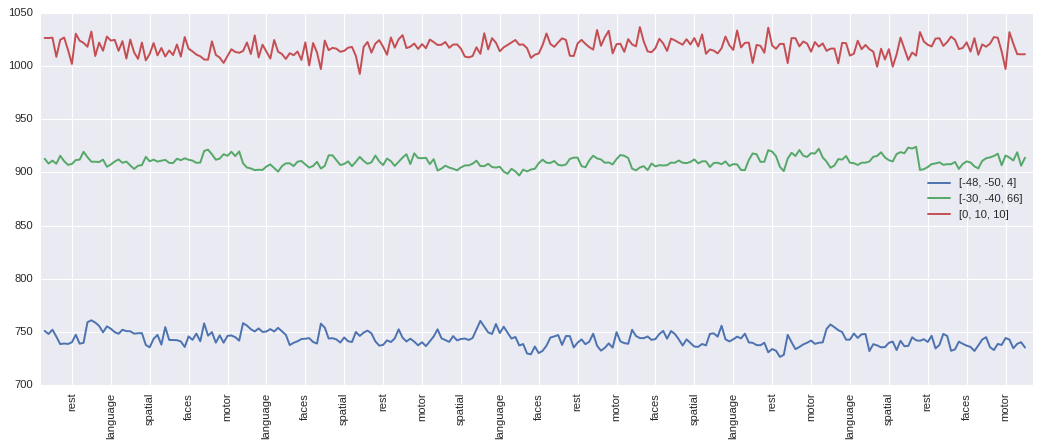

In [20]:
fig,ax = plt.subplots(1,1,figsize=(16,6))
for i,seed in enumerate(seedMaskerRaw.seeds_):
    plt.plot( blockDf[i].values,label=seed)
plt.xlim(-1,blockDf.shape[0]+1)

xConds = blockDf['condition'].dropna()
plt.xticks(np.arange(2,xConds.shape[0]+2)[5::10],xConds[5::10],rotation=90)
sns.despine()

plt.legend(loc='best')

plt.show()

### with standardization

In [21]:
dataDf,designDf = getData(1,seedMaskerStd,conf=False)
trDf = reshapeDesign(designDf,1)
blockDf,meanBlockDf = makeBlocks(trDf,dataDf)

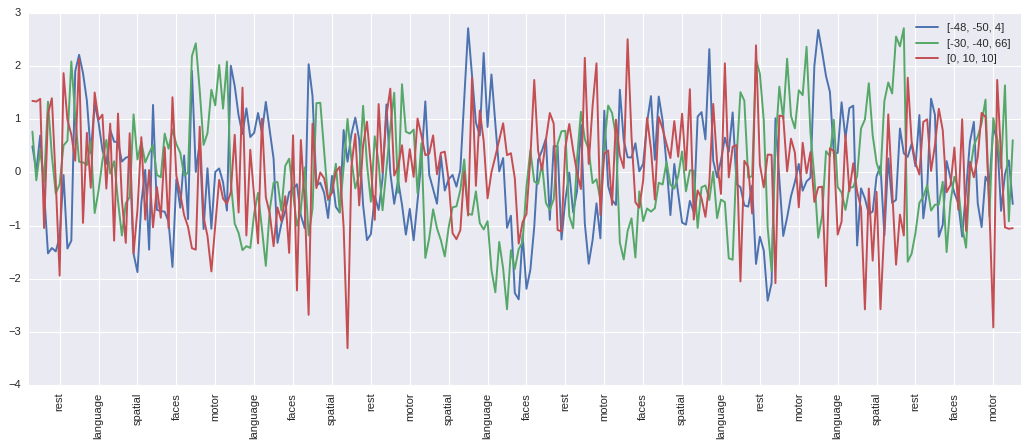

In [22]:
fig,ax = plt.subplots(1,1,figsize=(16,6))
for i,seed in enumerate(seedMaskerStd.seeds_):
    plt.plot( blockDf[i].values,label=seed)
plt.xlim(-1,blockDf.shape[0]+1)

xConds = blockDf['condition'].dropna()
plt.xticks(np.arange(2,xConds.shape[0]+2)[5::10],xConds[5::10],rotation=90)
sns.despine()

plt.legend(loc='best')

plt.show()

In [23]:
def reshapeThis(df):
    
    trDf = pd.DataFrame()
    for j in df.index:
        thisDf = pd.DataFrame( np.array([df.loc[j]]*10) )
        thisDf.columns = df.columns
        trDf = trDf.append(thisDf)
        
    # shift by two TR (account for HRF-delay of ca. 6 seconds)
    trDf.index = range(2,trDf.shape[0]+2)
    
    return trDf

In [24]:
meanTrBlockDf=blockDf.groupby('TR').mean()
meanTrDf = reshapeThis(meanTrBlockDf)

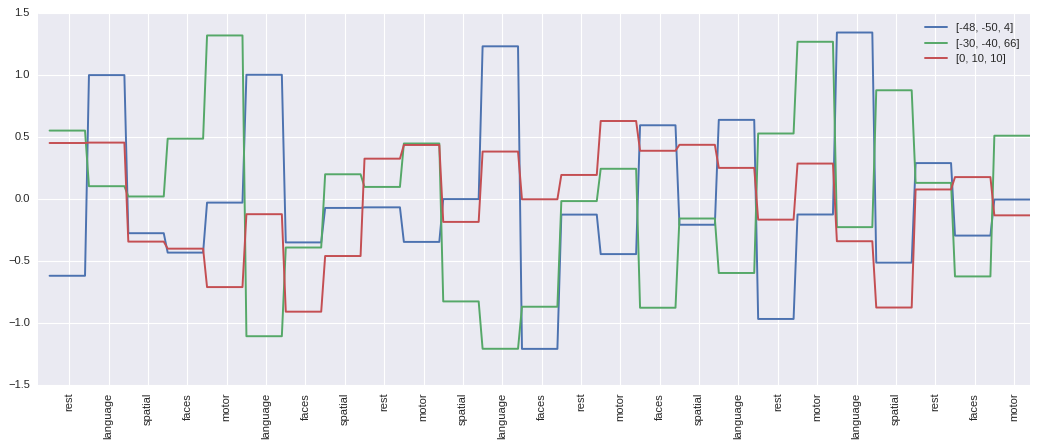

In [25]:
fig,ax = plt.subplots(1,1,figsize=(16,6))
for i,seed in enumerate(seedMaskerStd.seeds_):
    plt.plot( meanTrDf.index,meanTrDf[i].values,label=seed)
plt.xlim(-1,meanTrDf.shape[0]+1)
plt.legend(loc='best')

xConds = blockDf['condition'].dropna()
plt.xticks(np.arange(2,xConds.shape[0]+2)[5::10],xConds[5::10],rotation=90)
sns.despine()

plt.legend(loc='best')

plt.show()

### save all whole-brain data block-wise

In [26]:
bigBlockDf = pd.DataFrame()
for i,j in zip([1,2,3],[1,26,51]):
      
    dataDf,designDf = getData(i,brainMaskerStd,conf=True)
    trDf = reshapeDesign(designDf,j)
    blockDf,meanBlockDf = makeBlocks(trDf,dataDf)
  
    meanBlockDf.index = [['run00%s'%i]*meanBlockDf.shape[0],meanBlockDf.index]
    bigBlockDf = pd.concat([bigBlockDf,meanBlockDf])

In [27]:
bigBlockDf

0         1         2         3       \
       names                                                              
run001 faces_004_family         -0.337221 -0.261674 -0.447705 -0.463183   
       faces_007_friends         0.406736  0.427125  0.015802  0.134407   
       faces_013_movieactors    -0.803729 -0.765207  0.315829 -0.335106   
       faces_016_athletes        0.416349  0.372681  0.368322  0.256957   
       faces_024_tvactors        0.130858 -0.027075 -0.214070  0.041683   
       language_002_animals      0.377199  0.371269  0.208753  0.294844   
       language_006_tools        0.079687  0.169097 -0.180427 -0.336351   
       language_012_cities      -0.241019 -0.297598  0.307364  0.160643   
       language_018_countries   -0.154996 -0.147946 -0.474708 -0.483925   
       language_021_occupations  0.085977 -0.023571  0.044882  0.334655   
       motor_005_badminton       0.232851  0.211707  0.175249 -0.179907   
       motor_010_tennis          0.323449  0.174717 -0.318922  0.865977   
       motor_015_swimming       -0.410231 -0.373177 -0.214435 -0.214162   
       motor_020_soccer         -0.365402 -0.422123 -0.290296 -0.161451   
       motor_025_highjump        0.032260  0.165307 -0.162336 -0.339263   
       rest_001_rest             0.383816  0.345413 -0.421839  0.204600   
       rest_009_rest             0.210772  0.154903  0.267624  0.232909   
       rest_014_rest            -0.099611 -0.071073  0.516288  0.742223   
       rest_019_rest            -0.369821 -0.354001  0.156842  0.201624   
       rest_023_rest             0.800571  0.898288  0.118228  0.316837   
       spatial_003_citysquare   -0.409870 -0.343361  0.178760 -0.154857   
       spatial_008_market       -0.525955 -0.532538  0.320622 -0.216594   
       spatial_011_tramstation   0.027584  0.157118 -0.403917 -0.314847   
       spatial_017_trainstation -0.056431 -0.060108  0.103397 -0.234649   
       spatial_022_school        0.081708  0.126733  0.112864 -0.253421   
run002 faces_029_politicians     0.344705  0.118515 -0.089767  0.536890   
       faces_033_lectureres      0.278460  0.138843 -0.074483 -0.319463   
       faces_036_teachers       -0.436396 -0.250727  0.840851 -0.930371   
       faces_042_family          0.008166  0.106999  0.300277  0.359707   
       faces_047_friends        -0.133380 -0.201361  0.026851 -0.025188   
...                                   ...       ...       ...       ...   
       spatial_026_church        0.730507  0.578703  0.119718  1.370857   
       spatial_032_basement     -0.083324 -0.182674 -0.455861 -0.145466   
       spatial_038_promenade     0.174782  0.180183 -0.170454  0.051832   
       spatial_041_cityofkiel   -0.716268 -0.597343  0.383187 -0.751187   
       spatial_049_univesity    -0.095154 -0.263741 -0.714585  0.450920   
run003 faces_051_movieactors     0.035837  0.277597  0.414609  0.219754   
       faces_058_athletes        0.203997  0.147367 -0.260475 -0.230707   
       faces_064_family         -0.239555 -0.282957  0.317728  0.033827   
       faces_067_friends        -0.129945 -0.308557 -0.050691  0.233076   
       faces_074_politicians    -0.186277 -0.274415 -0.137317  0.144366   
       language_052_countries    0.057899 -0.142724  0.153769  0.254730   
       language_056_animals      0.041745  0.128881 -0.023491 -0.308807   
       language_062_animals     -0.176314  0.011080 -0.642809  0.312212   
       language_066_tools       -0.573870 -0.605712 -0.990530 -0.391563   
       language_073_fruit       -0.089872 -0.056241 -0.167115 -0.293949   
       motor_055_badminton      -0.074365 -0.452001 -0.113353  0.067093   
       motor_060_swimming        0.112817  0.274512  0.353906 -0.199740   
       motor_065_badminton       0.118147  0.130686 -0.134266  0.515010   
       motor_070_tennis          0.626708  0.519312 -0.423559 -0.076280   
       motor_075_climbing        0.381093  0.461640  0.332153 -0.286576   
       rest_053_rest             0.015891  0.052901  0.77776

In [28]:
def makeFiles(bigBlockDf,masker):
    # for the training run (all except run003)
    for i in bigBlockDf.drop('run003').index:
        thisIm = masker.inverse_transform(bigBlockDf.loc[i])
        thisName = '../train/%s.nii.gz'%i[-1]
        print 'writing %s to file...'%thisName
        thisIm.to_filename(thisName)
    # for the test run (dropping 1&2, leaving 3)
    for i in bigBlockDf.drop(['run001','run002']).index:
        thisIm = masker.inverse_transform(bigBlockDf.loc[i])
        thisName = '../test/%s.nii.gz'%i[-1]
        print 'writing %s to file...'%thisName
        thisIm.to_filename(thisName)
    return

In [29]:
makeFiles(bigBlockDf,brainMaskerStd)

writing ../train/faces_004_family.nii.gz to file...
writing ../train/faces_007_friends.nii.gz to file...
writing ../train/faces_013_movieactors.nii.gz to file...
writing ../train/faces_016_athletes.nii.gz to file...
writing ../train/faces_024_tvactors.nii.gz to file...
writing ../train/language_002_animals.nii.gz to file...
writing ../train/language_006_tools.nii.gz to file...
writing ../train/language_012_cities.nii.gz to file...
writing ../train/language_018_countries.nii.gz to file...
writing ../train/language_021_occupations.nii.gz to file...
writing ../train/motor_005_badminton.nii.gz to file...
writing ../train/motor_010_tennis.nii.gz to file...
writing ../train/motor_015_swimming.nii.gz to file...
writing ../train/motor_020_soccer.nii.gz to file...
writing ../train/motor_025_highjump.nii.gz to file...
writing ../train/rest_001_rest.nii.gz to file...
writing ../train/rest_009_rest.nii.gz to file...
writing ../train/rest_014_rest.nii.gz to file...
writing ../train/rest_019_rest.ni

### get secret run

In [30]:
def getSecretData(i,masker,conf=True):
    # get fmri run
    epi = '../data/wrrun00%s.nii.gz'%i
    #get movement parameters
    movement = '../data/rp_run00%s.txt'%i
    
    # extract data
    if conf:
        data=masker.transform(epi,confounds=movement)
    else:
        data=masker.transform(epi)
        
    # put into dataframe
    dataDf = pd.DataFrame(data)
    #get design file
    designDf = pd.read_csv('../data/run%s.csv'%i)
    print data.shape[0]
    print range(0,data.shape[0]-10,10)
    designDf['TR'] = range(0,data.shape[0]-10,10)
    return dataDf,designDf

In [31]:
dataDf,designDf = getSecretData(0,brainMaskerStd,conf=True)
trDf = reshapeDesign(designDf,0)
blockDf,meanBlockDf = makeBlocks(trDf,dataDf)

23
[0, 10]


In [32]:
for i in meanBlockDf.index:
    thisIm = brainMaskerStd.inverse_transform(meanBlockDf.loc[i])
    thisName = '../outofsample/%s.nii.gz'%i
    print 'writing %s to file...'%thisName
    thisIm.to_filename(thisName)

writing ../outofsample/rest_000_rest.nii.gz to file...
writing ../outofsample/secret_001_secret.nii.gz to file...


### store smoothed data

In [33]:
smooMasker = input_data.NiftiMasker(mask_img='../masks/MNI152_T1_2mm_brain_mask.nii.gz',
                                    smoothing_fwhm=8).fit()

In [34]:
trainList = ['../train/%s'%x for x in os.listdir('../train/') ]
testList = ['../test/%s'%x for x in os.listdir('../test/') ]
secretList = ['../outofsample/%s'%x for x in os.listdir('../outofsample/') ]

bigList = trainList+testList+secretList

In [35]:
bigList

['../train/motor_005_badminton.nii.gz',
 '../train/faces_004_family.nii.gz',
 '../train/faces_007_friends.nii.gz',
 '../train/faces_013_movieactors.nii.gz',
 '../train/faces_016_athletes.nii.gz',
 '../train/faces_024_tvactors.nii.gz',
 '../train/faces_029_politicians.nii.gz',
 '../train/faces_033_lectureres.nii.gz',
 '../train/faces_036_teachers.nii.gz',
 '../train/faces_042_family.nii.gz',
 '../train/faces_047_friends.nii.gz',
 '../train/language_002_animals.nii.gz',
 '../train/language_006_tools.nii.gz',
 '../train/language_012_cities.nii.gz',
 '../train/language_018_countries.nii.gz',
 '../train/language_021_occupations.nii.gz',
 '../train/language_028_fruits.nii.gz',
 '../train/language_034_clothing.nii.gz',
 '../train/language_039_vegetables.nii.gz',
 '../train/language_044_furniture.nii.gz',
 '../train/language_048_colors.nii.gz',
 '../train/motor_010_tennis.nii.gz',
 '../train/motor_015_swimming.nii.gz',
 '../train/motor_020_soccer.nii.gz',
 '../train/motor_025_highjump.nii.gz',

In [36]:
for im in bigList:
    smooIm = smooMasker.inverse_transform(smooMasker.transform(im))
    imName = im.split('/')[-1]
    print imName
    smooIm.to_filename('../smooIms/s8%s'%imName)

motor_005_badminton.nii.gz
faces_004_family.nii.gz
faces_007_friends.nii.gz
faces_013_movieactors.nii.gz
faces_016_athletes.nii.gz
faces_024_tvactors.nii.gz
faces_029_politicians.nii.gz
faces_033_lectureres.nii.gz
faces_036_teachers.nii.gz
faces_042_family.nii.gz
faces_047_friends.nii.gz
language_002_animals.nii.gz
language_006_tools.nii.gz
language_012_cities.nii.gz
language_018_countries.nii.gz
language_021_occupations.nii.gz
language_028_fruits.nii.gz
language_034_clothing.nii.gz
language_039_vegetables.nii.gz
language_044_furniture.nii.gz
language_048_colors.nii.gz
motor_010_tennis.nii.gz
motor_015_swimming.nii.gz
motor_020_soccer.nii.gz
motor_025_highjump.nii.gz
motor_030_climbing.nii.gz
motor_035_huerdlerace.nii.gz
motor_040_archery.nii.gz
motor_045_ropeskipping.nii.gz
motor_050_juggling.nii.gz
rest_001_rest.nii.gz
rest_009_rest.nii.gz
rest_014_rest.nii.gz
rest_019_rest.nii.gz
rest_023_rest.nii.gz
rest_027_rest.nii.gz
rest_031_rest.nii.gz
rest_037_rest.nii.gz
rest_043_rest.nii.gz

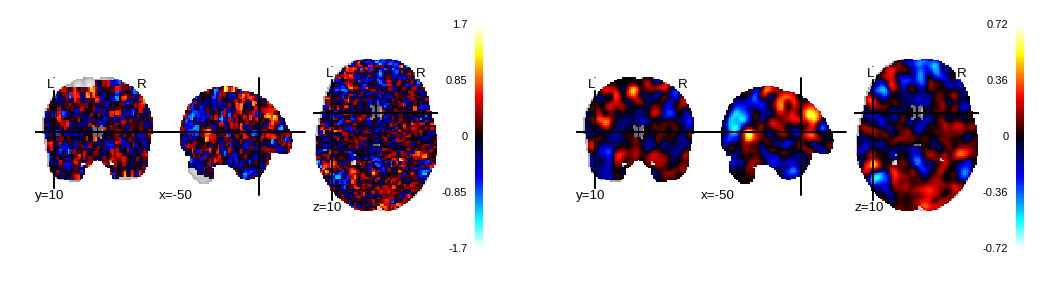

In [37]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(16,4))
p1 = plotting.plot_stat_map('../train/language_028_fruits.nii.gz',axes=ax1,cut_coords=(-50,10,10))
p2 = plotting.plot_stat_map('../smooIms/s8language_028_fruits.nii.gz',axes=ax2,cut_coords=(-50,10,10))
plt.show()

### make data which are smoothed before averaging, for classical statistics

In [38]:
smooStdMasker = input_data.NiftiMasker(mask_img='../masks/MNI152_T1_2mm_brain_mask.nii.gz',
                                       standardize=True,detrend=True,smoothing_fwhm=8).fit()

In [39]:
bigStatsDf = pd.DataFrame()

for i in range(2):
    
    dataDf,designDf = getData(i+1,smooStdMasker)
    dataDf.drop([0,1,252],inplace=True)
    thisConds = np.array([ np.array([x]*10) for x in designDf['condition'] ]).flatten()
    dataDf.index = [thisConds,dataDf.index]
    
    bigStatsDf = pd.concat([bigStatsDf,dataDf])

In [40]:
bigStatsDf

0         1         2         3         4         5       \
rest     2   -0.695134 -0.454835 -0.895681 -0.221158 -0.065017 -0.528193   
         3   -0.374593 -0.299384 -0.681689 -0.351621 -0.311293 -0.564998   
         4   -0.599094 -0.415662 -0.749298 -0.216665 -0.619677 -0.459878   
         5   -0.083330  0.159697 -0.145437 -0.608196  0.046782 -1.585067   
         6   -1.331327 -1.707782 -1.588579 -1.813464 -1.762218 -1.665666   
         7    0.013412  0.120304 -0.120634  0.514110  0.596066  0.460375   
         8    0.350331  0.028192 -0.162798  0.177324  0.325458  0.004101   
         9   -0.483596 -0.185596  0.095516 -0.466154 -0.285892 -1.447728   
         10  -0.823611 -0.683050 -0.368140 -0.726859 -0.637824 -1.053069   
         11   0.914396  1.783671  1.790192  1.374843  1.703107  1.213915   
language 12  -1.105852 -0.754060 -0.876561 -0.543065 -0.253620 -0.398824   
         13  -0.395820 -0.624676 -0.240171 -0.948132 -1.190030 -1.454828   
         14  -0.798268 -0.502845 -0.611358 -1.327123 -0.524535 -2.558670   
         15  -0.592321 -0.688915 -0.254570 -0.582002 -0.231779 -1.121622   
         16  -1.136863 -0.958555 -1.427391 -0.998004 -0.907088 -1.307216   
         17  -0.850799 -0.662954 -0.542873 -1.312336 -1.199249 -1.063504   
         18  -0.802443 -1.100181 -1.030143 -0.744550 -1.169969 -0.976148   
         19   0.499632  0.728036  0.928614  0.122714  0.229908  0.656739   
         20  -1.068869 -1.424563 -1.462891 -0.523717 -0.470526  0.014499   
         21   1.712230  1.837540  2.064841  1.249991  1.808348  0.858704   
spatial  22  -1.343848 -1.138992 -1.091245 -1.251187 -1.215354 -1.481514   
         23   0.007029  0.210977 -0.157089  0.527438  0.600642 -0.016917   
         24   0.713574  0.949512  1.169125  0.751349  0.835364  0.848839   
         25  -2.074977 -2.325835 -1.746609 -2.079668 -2.015273 -1.224792   
         26   1.200068  0.890324  0.623599  1.259876  1.310840  1.512267   
         27   1.209078  1.466915  1.795791  1.228790  1.349951  0.777968   
         28   0.260609 -0.005805 -0.321475 -0.149987 -0.566904  0.412089   
         29   0.753901  1.064811  0.843720  1.322617  0.975128  1.457026   
         30  -0.035021 -0.245563 -0.518711 -0.075473 -0.434965  0.460630   
         31   1.310435  1.076784  0.925852  1.395768  1.531219  2.222138   
...                ...       ...       ...       ...       ...       ...   
language 222 -0.613288 -0.620898 -0.151957 -0.430443 -0.583337 -0.545981   
         223 -0.355324 -0.460181 -0.764867  0.002684 -0.290433 -0.374633   
         224 -0.317666  0.207568 -0.000016 -0.476535 -0.236338 -0.423322   
         225  0.661106  0.171753 -0.594499 -0.023165 -0.172809  0.089668   
         226 -0.524847 -0.462679 -0.616812 -0.621265 -0.820994 -0.578953   
         227  1.012256  0.960183  0.829103  0.575781  0.851020  0.435982   
         228 -0.090690  0.444418  0.261096 -0.186692  0.074815  0.397277   
         229 -0.145506 -0.722246 -0.287840 -0.716698 -0.956308 -0.168132   
         230 -0.189961 -0.007833  0.605412  0.336577  0.247951  0.320447   
         231 -0.503804  0.075774 -0.088626  0.490016  0.265281  0.985170   
spatial  232  0.604775  0.120898  0.663921 -0.002517 -0.199832 -0.001538   
         233 -0.998353 -0.981945 -1.119486 -0.480002 -0.109549 -0.020432   
         234 -0.049849  0.102154  0.696941  0.466605  0.412747  0.059083   
         235  0.417268  0.516879  0.403720  0.883410  0.754946  0.582747   
         236  0.579327  0.511749 -0.353326  0.421924  0.049870  0.062163   
         237  1.604573  1.409641  1.124500  1.513778  1.404388  1.446545   
         238  0.372708  0.246689  0.448828  0.835446  0.742008  1.211194   
         239  0.449995  0.286953 -0.123243  0.776329  0.643714  1.499387   
         240  0.350107  0.308676  0.722925  1.048219  1.030822  1.445091   
         241  2.526819  2.278278  1.938670  2.406707  2.337162  2.008111   
motor    242  0.547257  0.385691  0.002632  0.851576  0.773823  

In [41]:
from scipy import stats

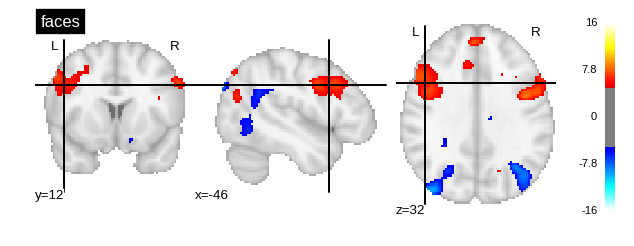

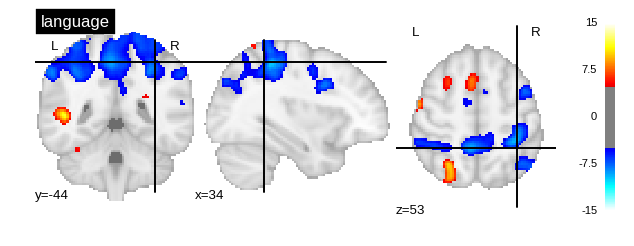

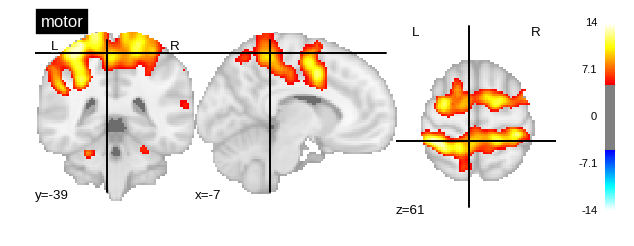

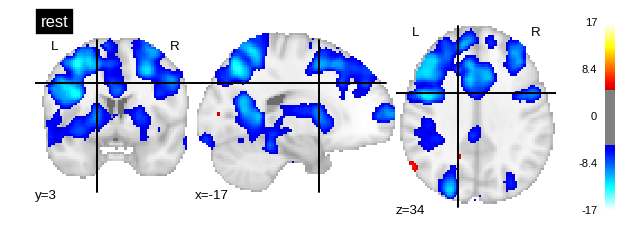

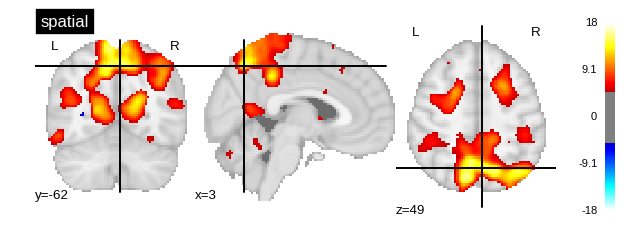

In [42]:
for i in bigStatsDf.index.levels[0]:
    t,p = stats.ttest_ind( bigStatsDf.loc[i],bigStatsDf.drop(i,level=0) )
    im = smooStdMasker.inverse_transform(t)
    plotting.plot_stat_map(im,threshold=5,title=i)
    plt.show()
    im.to_filename('../tMaps/tMap_%s.nii.gz'%i)

In [43]:
tDf = pd.DataFrame([t,p])

In [44]:
tDf = tDf.T
tDf.columns = ['t','p']

In [45]:
tDf[tDf['p']<=0.001].sort_values(by='p',ascending=False).iloc[0]

t    3.310408
p    0.000999
Name: 4103, dtype: float64